In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

In [14]:
data = pd.read_csv('./BankChurners.csv', sep=',')
df = data.copy()
pd.options.display.float_format = "{:,.2f}".format

In [15]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,0.00,1.00


In [16]:
df.replace({'Education_Level':{'Unknown': np.nan},
                  'Marital_Status':{'Unknown': np.nan},
                  'Income_Category':{'Unknown': np.nan}
                }, inplace = True)

In [17]:
# DADOS SOBRE O CLIENTE
# Age
# Gender
# Dependents
# Education
# Marital status - TEM VALORES UNKOWN
# Income

# DADOS SOBRE PRODUTO E RELACAO C/ CLIENTE
# Attrition Flag (conta aberta/fechada)
# Months on book
# Card category 
# Credit limit

# DEMAIS DADOS NÃO ESTÃO CLAROS

In [18]:
#olhando o dataframe notamos que as linhas abaixo são irrelevantes ou não estão claras, por isso serão dropadas
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1,
        inplace=True
       )

In [19]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,"10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00"
mean,"739,177,606.33",46.33,2.35,35.93,3.81,2.34,2.46,"8,631.95","1,162.81","7,469.14",0.76,"4,404.09",64.86,0.71,0.27
std,"36,903,783.45",8.02,1.30,7.99,1.55,1.01,1.11,"9,088.78",814.99,"9,090.69",0.22,"3,397.13",23.47,0.24,0.28
min,"708,082,083.00",26.00,0.00,13.00,1.00,0.00,0.00,"1,438.30",0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,"713,036,770.50",41.00,1.00,31.00,3.00,2.00,2.00,"2,555.00",359.00,"1,324.50",0.63,"2,155.50",45.00,0.58,0.02
50%,"717,926,358.00",46.00,2.00,36.00,4.00,2.00,2.00,"4,549.00","1,276.00","3,474.00",0.74,"3,899.00",67.00,0.70,0.18
75%,"773,143,533.00",52.00,3.00,40.00,5.00,3.00,3.00,"11,067.50","1,784.00","9,859.00",0.86,"4,741.00",81.00,0.82,0.50
max,"828,343,083.00",73.00,5.00,56.00,6.00,6.00,6.00,"34,516.00","2,517.00","34,516.00",3.40,"18,484.00",139.00,3.71,1.00


In [20]:
# retornamos apenas os dados categoricos
df.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,9015,10127
unique,2,2,6,3,5,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Informações obtidas utilizando o pandas profiler acima, é um pouco pesado por isso está comentado

Gender is highly correlated with Income_Category;

Gender is highly correlated with Credit_Limit;

Customer_Age is normaly distributed;

Dependent_count is highly correlated with Customer_Age

In [21]:
df.rename(columns= {'CLIENTNUM':'client_number','Customer_Age': 'Age',
                    'Attrition_Flag': 'Acc_status','Education_Level':'Education',
                    'Income_Category':'Income', 'Dependent_count': 'Dependents'}, inplace=True)

In [22]:
#TRANSFORMAR ACCOUNT STATUS EM DUMMIE

# DADOS SOBRE O CLIENTE
# Age
# Gender
# Dependents
# Education
# Marital status - TEM VALORES UNKOWN
# Income

# DADOS SOBRE PRODUTO E RELACAO C/ CLIENTE
# Attrition Flag (conta aberta/fechada)
# Months on book
# Card category 
# Credit limit

# DEMAIS DADOS NÃO ESTÃO CLAROS

# PERGUNTAS

# Quais variaveis/atributos mais afetam o churn? - Paulo
# O tipo de cartão está relacionado com o churn? - Carlos
# diferenças entre clientes atritados e remanecentes - Paulo
# Limite de crédito e churn estão correlacionados? - Carlos
# Tempo como cliente afeta o churn? - Igor
# Average utilization ratio está relacionado com churn? quanto mais baixo maior o churn? - Igor
# relação income / churn - Paulo
# relaçao marital status / churn - Renato
# total amount transactions / churn????? - Renato

In [23]:
df.Acc_status.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

Tempo como cliente afeta o churn? - Igor

Average utilization ratio está relacionado com churn? quanto mais baixo maior o churn? - Igor

Discretizando a coluna de attrition status:

In [12]:
df2=pd.get_dummies(df, columns=['Acc_status'], drop_first=False)
df2

,client_number,Age,Gender,Dependents,Education,Marital_Status,Income,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Acc_status_Attrited Customer,Acc_status_Existing Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,0,1
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,0,1
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,0,1
3,769911858,40,F,4,High School,NaN,Less than $40K,Blue,34,3,...,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,0,1
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,"4,003.00",1851,"2,152.00",0.70,15476,117,0.86,0.46,0,1
10123,710638233,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,...,"4,277.00",2186,"2,091.00",0.80,8764,69,0.68,0.51,1,0
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,"5,409.00",0,"5,409.00",0.82,10291,60,0.82,0.00,1,0
10125,717406983,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,...,"5,281.00",0,"5,281.00",0.54,8395,62,0.72,0.00,1,0


Agrupando dados utilizando o tempo total como cliente, em segmentos de igual frequencia, é possivel verificar que nao existe uma relação entre o tempo de conta e a quantidade de churn

In [13]:
df2.groupby(pd.qcut(df2.Months_on_book, 3))[['Acc_status_Attrited Customer']].sum()/df2.groupby(pd.qcut(df2.Months_on_book, 3))[['Acc_status_Attrited Customer']].count()

,Acc_status_Attrited Customer
Months_on_book,
"(12.999, 34.0]",0.15
"(34.0, 38.0]",0.17
"(38.0, 56.0]",0.16


Agrupando os dados, também em quartis de igual freqüencia, é possivel verificar que exite uma maior concentraçao de churn em função do ratio de

uso do carão em relaçao ao total de limite disponível, leavndoa. crer que pessoas que utlizam menos, ou que dependem menos do cartão,

tem uma probabilidade maior de cancelamento. É necessária uma avaliação mais completa, mas é possivel afirmar a importancia desse indicador através do gráfico 

In [32]:
df2.groupby(pd.qcut(df2.Avg_Utilization_Ratio, 3))[['Acc_status_Attrited Customer']].sum()/df2.groupby(pd.qcut(df2.Avg_Utilization_Ratio, 3))[['Acc_status_Attrited Customer']].count()

,Acc_status_Attrited Customer
Avg_Utilization_Ratio,
"(-0.001, 0.066]",0.30
"(0.066, 0.372]",0.10
"(0.372, 0.999]",0.09


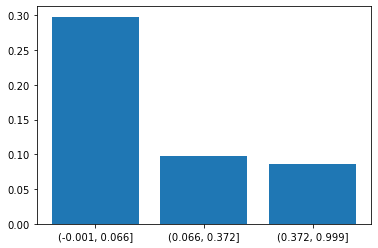

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

values=list(df2.groupby(pd.qcut(df2.Avg_Utilization_Ratio, 3))['Acc_status_Attrited Customer'].sum()/df2.groupby(pd.qcut(df2.Avg_Utilization_Ratio, 3))['Acc_status_Attrited Customer'].count())
axis=[str(list((pd.qcut(df2.Avg_Utilization_Ratio, 3).unique()))[0]),str(list((pd.qcut(df2.Avg_Utilization_Ratio, 3).unique()))[1]),str(list((pd.qcut(df2.Avg_Utilization_Ratio, 3).unique()))[2])]
plt.bar(axis,values)
plt.show()

Adicionalmente é possivel avaiar que mesmo combinadas as duas condições, o grau de utilização ainda é preponderante em relação ao tempo como cliente.

In [33]:
df2.groupby([pd.qcut(df2.Months_on_book, 3),pd.qcut(df2.Avg_Utilization_Ratio, 3)])[['Acc_status_Attrited Customer']].sum()/df2.groupby([pd.qcut(df2.Months_on_book, 3),pd.qcut(df2.Avg_Utilization_Ratio, 3)])[['Acc_status_Attrited Customer']].count()

Acc_status_Attrited Customer
Months_on_book Avg_Utilization_Ratio                              
(12.999, 34.0] (-0.001, 0.066]                                0.28
               (0.066, 0.372]                                 0.09
               (0.372, 0.999]                                 0.08
(34.0, 38.0]   (-0.001, 0.066]                                0.31
               (0.066, 0.372]                                 0.10
               (0.372, 0.999]                                 0.09
(38.0, 56.0]   (-0.001, 0.066]                                0.31
               (0.066, 0.372]                                 0.11
               (0.372, 0.999]                                 0.08